# Computer vision using `tensorflow`

This lab will help guide you in using `tensorflow` and the `keras` library which is a high-level abstraction for `tensorflow` the same way that `pandas` is for `numpy`. The `tensorflow` library is a framework for training and deploying machine learning models and deep learning especially. You can find additinal resources on using it on their [website](https://www.tensorflow.org/).

For this example we will use `tensorflow` with the MNIST dataset. The MNIST dataset is database of handwritten digits. The associated number to each image is provided in the dataset. This problem is a multiclass classification which we will use `tensorflow` to solve without needing to train one classifier per class like we did in **one-vs-rest** when using SVMs.

In [1]:
!pip install tensorflow

     |████████████████████████████████| 516.2 MB 9.1 kB/s  eta 0:00:01  |▏                               | 3.0 MB 570 kB/s eta 0:14:59     |▎                               | 3.7 MB 570 kB/s eta 0:14:58     |█▊                              | 27.6 MB 15.8 MB/s eta 0:00:31     |██████████████                  | 225.1 MB 14.1 MB/s eta 0:00:21     |█████████████████▎              | 278.1 MB 13.9 MB/s eta 0:00:18     |██████████████████████████      | 420.1 MB 19.9 MB/s eta 0:00:05     |█████████████████████████████▎  | 472.2 MB 17.7 MB/s eta 0:00:03
     |████████████████████████████████| 3.0 MB 14.8 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 3.0 MB/s  eta 0:00:01
     |████████████████████████████████| 454 kB 14.2 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 5.1 MB/s eta 0:00:011
     |████████████████████████████████| 42 kB 1.7 MB/s  eta 0:00:01
     |████████████████████████████████| 104 kB 14.8 MB/s eta 0:00:01
     |████████████████████████████████

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.2.0'

Now that we imported TensorFlow library and Keras, we can start using them. Keras contains a version of the MNIST dataset which we will use in this lab. The next cell will read the MNIST dataset.

In [4]:
data = tf.keras.datasets.mnist

After loading the data, we will split it into training and testing.

In [5]:
(x_train, y_train), (x_test, y_test) = data.load_data()

11493376/11490434 [==============================] - 1s 0us/step


The training data consists of 60000 images of $28 \times 28$ pixels.

In [6]:
print("Training data dimensions: {}".format(x_train.shape))
print("Test data dimensions: {}".format(x_test.shape))

Training data dimensions: (60000, 28, 28)
Test data dimensions: (10000, 28, 28)


Let's look at a small section of the first example in the training data. This is the numeric representation of the top-left corner of the first image. Because we only have a single **channel**, the image is a grey-scale image.

In [7]:
x_train[0, 0:10, 0:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156]], dtype=uint8)

Let's check the label of the first image

In [8]:
y_train[0]

5

We will now plot the images to see what we are working with.

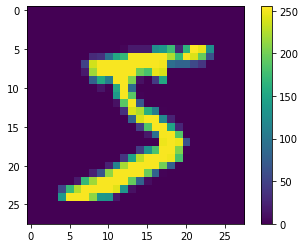

In [9]:
plt.figure()
plt.imshow(x_train[0, :, :])
plt.colorbar()
plt.grid(False)
plt.show()

We notice each pixel can take values between 0 and 255. Neural networks work better when we normalize our data. To do that in our case, we can just divide each pixel value by 255, so that we end of with values between 0 and 1. This is similar to doing min-max normalization.

In [10]:
x_train, x_test = x_train / 255.0, x_test / 255.0

We then check if our scaling worked.

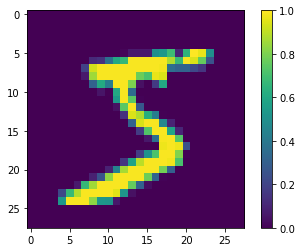

In [11]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Before we build our deep learning model, let us explore what the data looks like. For that, we will plot our training images with their associated classes or digit.

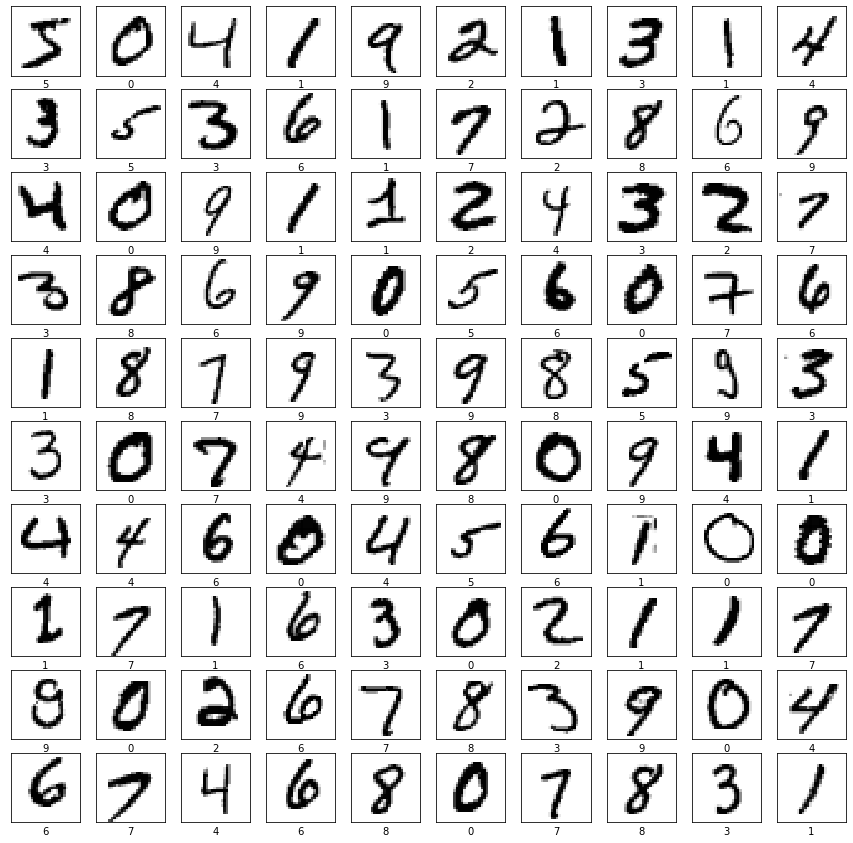

In [12]:
plt.figure(figsize = (15, 15))
for i in range(10*10):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Training a baseline model

Let's start by training a model using `sklearn`. As mentioned in previous notebooks, it's always good to have a **baseline** accuracy in mind, so that we can then see by how much our fancy new model can improve on that baseline, and at what cost (in terms of computation and otherwise).

To train our baseline model, we are going to use two algorithms: `LogisticRegression` because it's an efficient model and usually performs well with little need to tune it, and `MLPClassifier` which is a neural nework model in `sklearn`, so we can see what kinds of shortcomings it has compared to training a neural network model using `tensorflow` and `keras`.

### Exercise



The first problem we run into with our models is that each row of our data right now is a $28 \times 28$ matrix. The models we used so far in `sklearn` only work with tabular data: **rows and columns**. So we need to **flatten** our data. This means that every the data will have $28 \cdot 28 = 784$ columns. By doing so, we remove some amount of **structure** from the data, which is not a good idea, but we come back to this topic in the next lecture. 

- Use `reshape` in `numpy` to change the dimensionality of the data. Call the flat data `x_train_flat` and `x_test_flat`.

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
x_train_flat = x_train.reshape((60000, 784))
print(x_train_flat.shape)
x_train_flat

(60000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
x_test_flat = x_test.reshape((10000, 784))
print(x_test_flat.shape)
x_test_flat

(10000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

- Train a logistic regression model and increase `max_iter` to 10000 to make sure that the model runs for enough iterations to converges. Store the predictions in `y_hat_train` and `y_hat_test`.

In [16]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter=10000).fit(x_train_flat, y_train)
y_hat_train = clf.predict(x_train_flat)
y_hat_test = clf.predict(x_test_flat)
print('Done predicting....')

Done predicting....


- Since the data is well-balanced, we can rely on accuracy to evaluate the model and make sure we're not over-fitting. Get the model's accuracy on the training and test data. We wrote some code to make it easier.

In [17]:
from sklearn.metrics import accuracy_score


acc_train = accuracy_score(y_train, y_hat_train) # change code here
acc_test = accuracy_score(y_test, y_hat_test) # change code here

print("Training data accuracy is {:2.0f}%".format(acc_train * 100))
print("Test data accuracy is {:2.0f}%".format(acc_test * 100))

Training data accuracy is 94%
Test data accuracy is 93%


Now we train a neural network using `sklearn`. We use `MLPClassifier` where MLP stands for multi-layer perceptron, which is the typical densely-connected neural network. The most important argument is has is `hidden_layer_sizes` where you specify the number of neurons in each hidden layer as a list of integers. So for example, letting `hidden_layer_sizes = [4, 3]` means that we want 2 hidden layers (size of the list) with 4 neurons in hidden layer 1 and 3 neurons in hidden layer 2. Neural networks can be very compute hungry, so we want to keep the number of layers and the number of neurons small.

- Train a neural network using `MLPClassifier`. Specify only a single hidden layer with 8 neurons.

In [31]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(8,8), random_state=1).fit(x_train_flat, y_train)

mlp_y_hat_train = mlp_clf.predict(x_train_flat)
mlp_y_hat_test = mlp_clf.predict(x_test_flat)
print('Done predicting....')

Done predicting....


Get the accuracy on the training and test data for the neural network. Which model performed better? The neural network or the logistic regression?

In [36]:
mlp_acc_train = accuracy_score(y_train, mlp_y_hat_train) # change code here
mlp_acc_test = accuracy_score(y_test, mlp_y_hat_test) # change code here

print("Training data accuracy is {:2.0f}%".format(mlp_acc_train * 100))
print("Test data accuracy is {:2.0f}%".format(mlp_acc_test * 100))

Training data accuracy is 95%
Test data accuracy is 93%


### End of exercise

So we can see from the accuracy that a logistic regression model can give neural networks a good run for your money, and in a fraction of the time. So neural networks better have something to show for it! It gets better, so keep going. With that in mind, let's now move to using `tensorflow`.

## Introduction to `tensorflow`

Before training our model let's learn a little about `tensorflow` and `keras`. The `tensorflow` library is a **low-level** library whose basic object is a **tensor**. A `tensor` object is very similar to an `array` object in `numpy`, but with some important differences that we will explain later. 

Let's look at an example. First we create two 2D `array` objects in numpy and multiply them together. Note that a 2D `array` object is what we called a marix, and so the multiplication here is **matrix multiplication**, for which we use `np.dot`.

In [37]:
c = np.array([[1.0, 2.0], [3.0, 4.0]])
d = np.array([[1.0, 1.0], [0.0, 1.0]])
e = np.dot(c, d)
e

array([[1., 3.],
       [3., 7.]])

Here's the `tensorflow` equivalent to doing the above. We use `tf.constant` to create the tensors, and use `tf.matmult` instead of `np.dot` to do the matrix multiplication.

In [38]:
c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])
e = tf.matmul(c, d)
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 3.],
       [3., 7.]], dtype=float32)>

There are a lot of similar functions between the two libraries. In fact, the following cell prints the names of all the functions that have the same names in `numpy` and `tensorflow`. This isn't to say that the functions behaves in exactly the same way, but most of them serve the same purpose.

In [39]:
print("\t".join([f for f in dir(np) if f in dir(tf) and '_' not in f]))

abs	add	argmax	argmin	argsort	bool	cast	compat	complex	complex128	complex64	core	cos	cosh	cumsum	divide	double	einsum	equal	exp	eye	float16	float32	float64	floor	greater	half	identity	int16	int32	int64	int8	less	linalg	linspace	math	matmul	maximum	meshgrid	minimum	multiply	negative	newaxis	ones	pad	random	repeat	reshape	roll	round	searchsorted	shape	sign	sin	sinh	size	sort	split	sqrt	square	squeeze	stack	subtract	tan	tanh	tensordot	test	tile	transpose	uint16	uint32	uint64	uint8	unique	version	where	zeros


A constant tensor like the one we created above is used to hold values that don't change, such as data. There are also tensors that can be creates as a `Variable` object: such a tensor would store values that are subject to change, such as the weights and biases of a neural network as they get updates iteration after iteration.

In [40]:
e = tf.Variable([[1., 3.], [3., 7.]])
e

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 3.],
       [3., 7.]], dtype=float32)>

When we design a neural network at a low level, we define it by the linear algebra operations that take place for the network to go from the input data to its output: in other words the **forward pass**. We saw earlier that during **backpropagation** we traverse the network in the opposite direction and carry the gradient of the loss w.r.t. the weights and biases as we go. Of course, this meant that we needed to calculate the derivatives, which depended on the choice of the loss function itself, and on the operations we carried as we applied the chain rule. In `tensorflow` and other deep learning frameworks such as `Pytorch`, we have a concept called **auto-differentiation**, which automatically handles this for us. That means the most difficult part of creating a neural network: the backward pass, is now handled automatically! 

In addition to auto-differentiation, another big advatage of tensors are that they run on GPUs, whereas the `numpy` library only runs on CPUs. This means the same calculation can be hundreds or thousands of times faster if we use `tensorflow` instead of `numpy` (assuming we have a GPU and have `tensorflow` set up properly).

Now let's talk about `keras`. Even auto-differentiation, designing a neural network at a low-level is still a daunting task in practice, and one that most practitioners don't engage in. Instead we use the `keras` library, which is a **high-level** library that allows us to create and train a neural network from scratch in just a few lines of code and without explicitly doing our own linear algebra. For example, instead of tensors and matrix operations, `keras` has higher abstractions such as `layers`.

In [41]:
keras.layers.Conv2D

tensorflow.python.keras.layers.convolutional.Conv2D

Let's see `keras` in action now. Following our data exploration, we will now build our model which requires us to configure its layers, and then compile it. For this problem we will have 3 layers: an input layer, a hidden layer, and output layer. We will build a dense network, where all the neurons are connected to the next layer.

By using `keras.Sequential`, we can chain a few layers to create a network, specifying a few arguments along the way:

- The first layer `tf.keras.layers.Flatten` converts the images from a 2d-array to a 1d-array of 28 * 28 = 784 pixels. 
- The next layer `tf.keras.layers.Dense` is a **densely-connected**, or **fully-connected** layers with 128 nodes (or neurons) and a **ReLU** activation function.
- The next layer `tf.keras.layers.Dense` is anther dense layer with 10 nodes. Since this is the last layer, it is the **output layer**. This explains why it has 10 nodes: we're training a model that is distinguishing between the digits 0-9. We apply a `softmax` activation function to it. This is because softmax takes the output of the last layer and turns it into probabilities.

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

Before we train our model, we need to compile it by defining our optimizer, loss function, and the metric used to monitor the training steps.

In [50]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

After compiling our model, we train the model the same way we do in `sklearn`: we call `fit` and pass the training data and the labels. In `keras` we also need to specify the number of epochs we wish to train.

In [51]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2237 - accuracy: 0.9347
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0919 - accuracy: 0.9721
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616 - accuracy: 0.9810
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0433 - accuracy: 0.9860
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0315 - accuracy: 0.9902


You notice that for each epoch, the model prints out the accuracy while it trains. After done training, we will now evaluate our model on the test set. Calling evaluate is a shortcut: it first calls `model.predict` to get predictions for the test data, and then obtains the loss on the test data. Since we specified `sparse_categorical_crossentropy` as the loss function to use when we compiled the model, we don't need to specify that here again. Additionally, during training and testing, we are also presented with the accuracy.

In [52]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0721 - accuracy: 0.9770
Test accuracy: 0.9769999980926514


We notice that the accuracy of our training set is higher than that of the test set. This is an example of over-fitting.

Now, let us take a look at what a neural network predicts.

In [53]:
predictions = model.predict(x_test)

Let's look at the prediction for the first image in the data, and compare it to it's label.

In [54]:
print(y_test[0])
print(predictions[0])

7
[1.5062735e-08 3.6422682e-10 9.5858091e-08 2.0470408e-05 1.9069084e-10
 1.0509624e-09 1.4196309e-11 9.9997675e-01 4.2342636e-09 2.6352961e-06]


We can see the probabilities which the neural network output for our first prediction at all the output layers. To know which class it predicted we apply `argmax` to the outputs.

In [55]:
np.argmax(predictions[0])

7

We now plot a sample of the test set with their respective predicted class and associated probability.

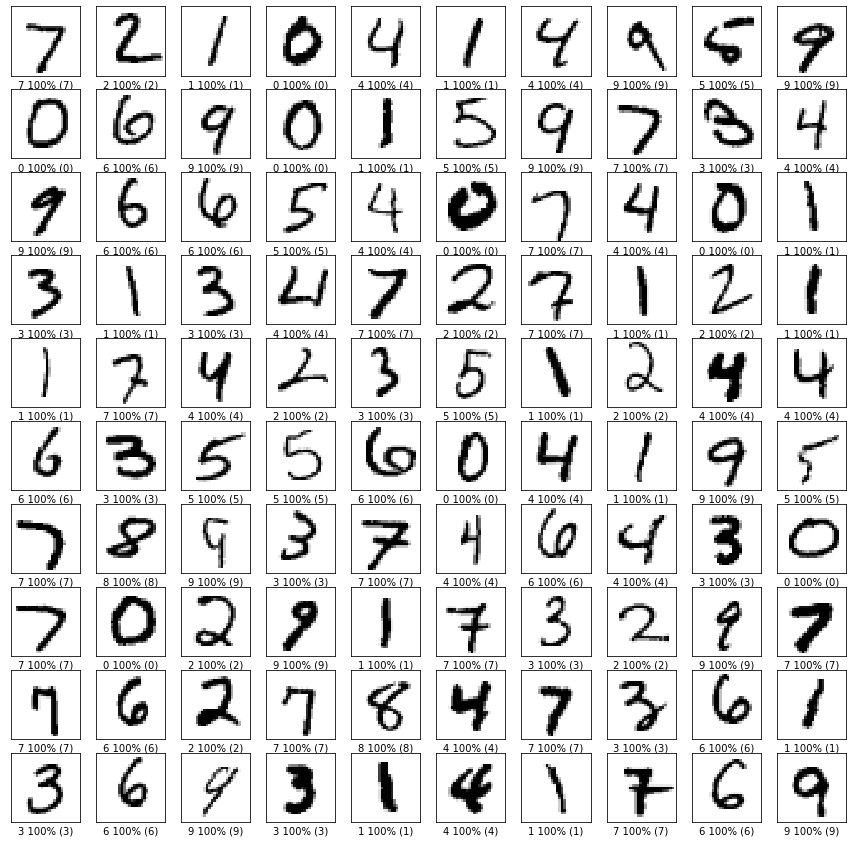

In [56]:
plt.figure(figsize = (15, 15))
for i in range(10*10):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap = plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(np.argmax(predictions[i]), 100 * np.max(predictions), y_test[i]))
plt.show()

So we can see that we're able to beat logistic regression using a neural network with a single hidden layer. Since the logistic regression model had high performance, it may seem like a slight improvement in preformance that we wrung out of our deep learning model is model and maybe not worth the cost in compute. But depending on the use-case, these modest improvements in performance can have very large practical impact.